# ***Muziek classificeren***

|Teamleden|Kaggle Username|GitHub Username|
|--|--|--|
|Busse Heemskerk|bussejheemskerk|BJHeemskerk|
|Declan van den Hoek|declanvdh|DeclanvandenHoek|
|Isa Dijkstra|isadijkstra|IsaD01|

In dit notebook gaan we kleine muziek samples classificeren met behulp van unsupervised learning. Een deel van deze bestand heeft een genre label, terwijl de meeste dit niet zullen hebben. Aan ons is de taak om zo accuraat mogelijk te bepalen welke genres de unlabeled samples hebben, door middel van Unsupervised Learning.

Voor het project hebben we gewerkt in [GitHub](https://github.com/BJHeemskerk/MachineLearning/tree/main/Muziek), om makkelijk de bestanden te delen. Van elk model zijn de voorspellingen ook geupload naar [Kaggle](https://www.kaggle.com/competitions/muziek-genre-clustering/overview).

## **Libaries en data inladen** <a name='h1'></a>

In [14]:
import os
import librosa as lr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd

# Om audio af te kunnen spelen
from IPython.display import Audio

In de onderstaande cel, die gebaseerd is op de code van het Machine Learning notebook uit week 11, wordt de data ingelezen en in een dataframe gezet.

In [2]:
# Load labeled data from CSV
labeled_data = pd.read_csv("labels_new.csv", sep=',')
labeled_data = labeled_data.sort_values('filename')

# Map pakken met de juiste samples
base_dir = "labeled"

# Aanmaken lists voor data
audio_data = []
sample_freqs = []

# Lengte is 30 sec op 16000Hz
lengte = 30 * 16000

# Process each audio file
for file in os.listdir(base_dir):
    if file.endswith(".wav"):
        file_path = os.path.join(base_dir, file)
        data, sfreq = lr.load(file_path, sr=None)

        # Truncate or pad the audio
        if len(data) > lengte:
            # Truncate the data
            data = data[:lengte]
        elif len(data) < lengte:
            # Pad with zeros
            padding = lengte - len(data)
            data = np.pad(data, (0, padding), mode='constant')

        # Append the processed data and label
        audio_data.append(data)
        sample_freqs.append(sfreq)

# Convert to numpy array
audio_data = np.stack(audio_data, axis=0)
sample_freqs = np.array(sample_freqs)

# Create a DataFrame from the processed audio data
audio_df = pd.DataFrame({'filename': os.listdir(base_dir), 'data': audio_data.tolist(), 'Hz': sample_freqs})

# Merge the labeled_data DataFrame with the audio_df DataFrame based on the 'Filename' column
df = labeled_data.merge(
    audio_df, how='left', on='filename'
    )

# Display the merged DataFrame
display(df)


filename      genre                                               data  \
0   m00002.wav       jazz  [-0.016357421875, -0.0228271484375, -0.0146789...   
1   m00039.wav     reggae  [-0.09478759765625, -0.15338134765625, -0.1439...   
2   m00041.wav        pop  [0.078033447265625, -0.03765869140625, 0.12664...   
3   m00072.wav      disco  [0.1060791015625, 0.0849609375, 0.062103271484...   
4   m00096.wav      disco  [-0.03607177734375, -0.105682373046875, -0.201...   
5   m00102.wav  classical  [0.007843017578125, 0.00726318359375, 0.005828...   
6   m00112.wav     reggae  [-0.00262451171875, -0.003753662109375, -0.003...   
7   m00138.wav     reggae  [-0.02630615234375, -0.028778076171875, -0.013...   
8   m00192.wav  classical  [0.069671630859375, 0.065948486328125, 0.04238...   
9   m00206.wav     hiphop  [-0.1112060546875, -0.198211669921875, -0.1393...   
10  m00230.wav    country  [0.120086669921875, 0.1708984375, 0.1174011230...   
11  m00236.wav  classical  [-0.006622314453125, -0.009185791015625, -0.00...   
12  m00248.wav      metal  [0.051422119140625, 0.070953369140625, 0.02395...   
13  m00253.wav      blues  [-0.236968994140625, -0.296875, -0.08099365234...   
14  m00298.wav      blues  [0.046478271484375, 0.063995361328125, 0.04327...   
15  m00313.wav      blues  [-0.03338623046875, -0.050201416015625, -0.031...   
16  m00338.wav      blues  [-0.213592529296875, -0.35723876953125, -0.314...   
17  m00339.wav       rock  [0.05926513671875, 0.063323974609375, 0.033294...   
18  m00351.wav       jazz  [0.090728759765625, 0.13885498046875, 0.082733...   
19  m00400.wav      blues  [0.042816162109375, 0.067962646484375, 0.06079...   
20  m00421.wav        pop  [-0.1217041015625, -0.11859130859375, -0.12683...   
21  m00429.wav     hiphop  [0.2825927734375, 0.35748291015625, 0.16244506...   
22  m00435.wav  classical  [-0.072723388671875, -0.125762939453125, -0.11...   
23  m00454.wav     hiphop  [-0.15728759765625, -0.273651123046875, -0.235...   
24  m00477.wav  classical  [-0.0003662109375, -0.00286865234375, -0.00531...   
25  m00501.wav       jazz  [-0.28155517578125, -0.360931396484375, -0.401...   
26  m00503.wav      metal  [0.022216796875, 0.029693603515625, 0.03231811...   
27  m00513.wav        pop  [-0.094635009765625, -0.11407470703125, -0.135...   
28  m00553.wav      disco  [-0.081451416015625, -0.06890869140625, -0.023...   
29  m00606.wav    country  [0.037261962890625, 0.029815673828125, 0.02386...   
30  m00623.wav     reggae  [0.284759521484375, 0.240753173828125, 0.31909...   
31  m00627.wav      metal  [0.03741455078125, -0.07257080078125, -0.11480...   
32  m00629.wav    country  [0.09033203125, 0.119537353515625, 0.108215332...   
33  m00633.wav    country  [0.065185546875, 0.10369873046875, 0.078186035...   
34  m00637.wav     hiphop  [0.24969482421875, 0.38006591796875, 0.3064575...   
35  m00658.wav     hiphop  [-0.01031494140625, -0.00103759765625, 0.01626...   
36  m00671.wav     reggae  [-0.133453369140625, -0.126983642578125, -0.12...   
37  m00676.wav        pop  [0.35791015625, 0.397918701171875, 0.328704833...   
38  m00677.wav    country  [-0.17755126953125, -0.2388916015625, -0.15670...   
39  m00678.wav      metal  [-0.06201171875, -0.06475830078125, 0.01269531...   
40  m00716.wav       jazz  [-0.032073974609375, -0.057586669921875, -0.04...   
41  m00762.wav      disco  [-0.158538818359375, -0.155303955078125, -0.15...   
42  m00772.wav       rock  [-0.034149169921875, -0.038360595703125, 0.003...   
43  m00773.wav        pop  [0.061676025390625, 0.06103515625, 0.060058593...   
44  m00801.wav       rock  [0.0626220703125, 0.059814453125, 0.0580444335...   
45  m00821.wav      metal  [-0.18701171875, -0.113555908203125, -0.061248...   
46  m00850.wav      disco  [-0.189208984375, -0.242401123046875, -0.16857...   
47  m00867.wav       rock  [0.072723388671875, 0.10369873046875, 0.102111...   
48  m00895.wav       rock  [0.0489501953125, 0.016876220703125, 0.0609130...   
49  m0

Nu de data is ingeladen kunnen we met behulp van de Audio functie een bestand afspelen in het notebook.

In [3]:
# Pick a random audio clip
random_index = np.random.choice(len(df), size=1, replace=False).item()

# Access the data, Hz, filename, and genre
clip = np.array(df.at[random_index, 'data'])
sfreq = df.at[random_index, 'Hz']
file = df.at[random_index, 'filename']
genre = df.at[random_index, 'genre']

# Print the name and genre
print(f"File and genre: {file}, {genre}")

# Play the clip
Audio(data=clip, rate=sfreq)


File and genre: m00112.wav, reggae


In [13]:
audiofile = 'm00002.wav'
y, sr = librosa.load(audiofile, sr=None)

In [21]:
audiofile1 = 'm00039.wav'
y1, sr1 = librosa.load(audiofile1, sr=None)

In [32]:
audiofile2 = 'm00102.wav'
y2, sr2 = librosa.load(audiofile2, sr=None)

## **Feature Engineering** <a name='h2'></a>

# Tempo

Tempo in de muziek verwijst naar de snelheid waarmee een muziekstuk wordt gespeeld. Het tempo wordt vaak afgedrukt in beats per minute (BPM). Hoe hoger het getal, hoe sneller de muziek is. 
- https://tweedehands-gitaar.nl/muziektheorie/begrippen/tempo
- https://librosa.org/doc/main/generated/librosa.beat.beat_track.html

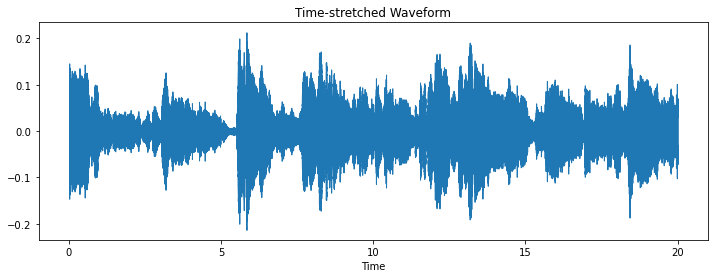

In [15]:
# Analyzing tempo
#Using librosa's beat tracking functionality to estimate tempo
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# Modifying tempo
#Time-stretching to change the tempo
y_stretched = librosa.effects.time_stretch(y=y, rate=1.5)

# Displaying the stretched waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_stretched, sr=sr)
plt.title('Time-stretched Waveform')
plt.show()

# Play the time-stretched audio
ipd.Audio(y_stretched, rate=sr)


In [19]:
tempo_dict = {}
for num in range(20):
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo_dict[f'tempo{num+1}_ '] = tempo

df_tempo = pd.DataFrame(tempo_dict.items())
df_tempo
    

0           1
0    tempo1_   129.199219
1    tempo2_   129.199219
2    tempo3_   129.199219
3    tempo4_   129.199219
4    tempo5_   129.199219
5    tempo6_   129.199219
6    tempo7_   129.199219
7    tempo8_   129.199219
8    tempo9_   129.199219
9   tempo10_   129.199219
10  tempo11_   129.199219
11  tempo12_   129.199219
12  tempo13_   129.199219
13  tempo14_   129.199219
14  tempo15_   129.199219
15  tempo16_   129.199219
16  tempo17_   129.199219
17  tempo18_   129.199219
18  tempo19_   129.199219
19  tempo20_   129.199219

In [37]:
tempo_dict = {}
for num in range(20):
    tempo, _ = librosa.beat.beat_track(y=y1, sr=sr1)
    tempo_dict[f'tempo{num+1}_ '] = tempo

df_tempo = pd.DataFrame(tempo_dict.items())
df_tempo
    

0           1
0    tempo1_   135.999178
1    tempo2_   135.999178
2    tempo3_   135.999178
3    tempo4_   135.999178
4    tempo5_   135.999178
5    tempo6_   135.999178
6    tempo7_   135.999178
7    tempo8_   135.999178
8    tempo9_   135.999178
9   tempo10_   135.999178
10  tempo11_   135.999178
11  tempo12_   135.999178
12  tempo13_   135.999178
13  tempo14_   135.999178
14  tempo15_   135.999178
15  tempo16_   135.999178
16  tempo17_   135.999178
17  tempo18_   135.999178
18  tempo19_   135.999178
19  tempo20_   135.999178

In [23]:
df['tempo'] = librosa.beat.beat_track(y=y, sr=sr)
df

ValueError: Length of values (2) does not match length of index (50)

In [28]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beats

array([   4,   23,   44,   64,   85,  106,  127,  148,  168,  188,  208,
        228,  249,  269,  289,  308,  329,  350,  370,  391,  411,  432,
        452,  472,  493,  514,  534,  555,  574,  593,  613,  633,  654,
        673,  694,  715,  736,  756,  777,  798,  819,  838,  859,  879,
        900,  920,  936,  952,  971,  992, 1013, 1033, 1054, 1075, 1096,
       1116, 1136, 1157, 1177, 1196, 1215, 1234, 1253, 1272])

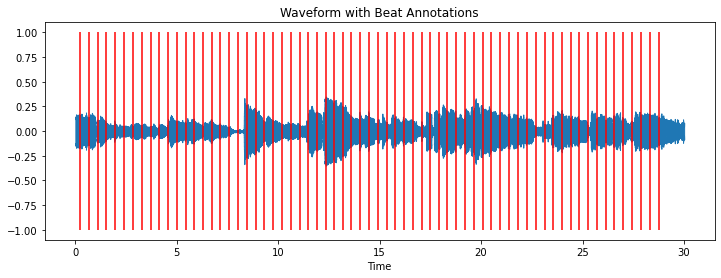

In [30]:
# Displaying the beats on the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=y, sr=sr)
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.title('Waveform with Beat Annotations')
plt.show()

# Play the audio
ipd.Audio(audiofile)

In [29]:
tempo, beats = librosa.beat.beat_track(y=y1, sr=sr1)
beats

array([  10,   28,   47,   66,   85,  104,  122,  141,  160,  178,  196,
        215,  234,  252,  271,  289,  308,  327,  345,  364,  383,  401,
        420,  438,  457,  476,  494,  513,  532,  550,  568,  586,  605,
        623,  642,  661,  679,  698,  717,  735,  753,  772,  790,  809,
        827,  847,  865,  883,  902,  921,  939,  958,  977,  996, 1015,
       1033, 1052, 1070, 1089, 1107, 1126, 1144, 1163, 1181, 1200, 1219,
       1238])

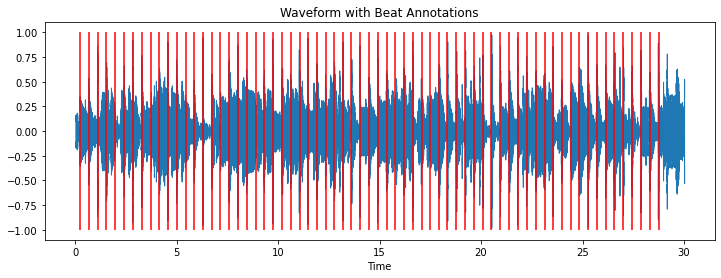

In [31]:
# Displaying the beats on the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=y1, sr=sr1)
plt.vlines(librosa.frames_to_time(beats, sr=sr1), -1, 1, color='r')
plt.title('Waveform with Beat Annotations')
plt.show()

# Play the audio
ipd.Audio(audiofile1)

In [34]:
tempo, beats = librosa.beat.beat_track(y=y2, sr=sr2)
tempo


123.046875

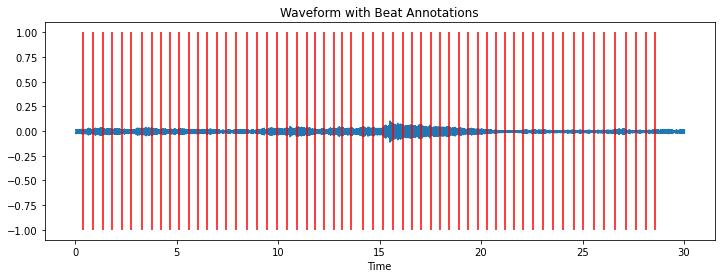

In [35]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=y2, sr=sr2)
plt.vlines(librosa.frames_to_time(beats, sr=sr2), -1, 1, color='r')
plt.title('Waveform with Beat Annotations')
plt.show()

# Play the audio
ipd.Audio(audiofile2)

# Harmonie

Harmonie in de muziek betekent dat verschillende tonen op hetzelfde moment worden gespeeld of gezongen. Uit de functie krijg je een audio tijdserie die de harmonische elementen laat zien.


Harmonie in de muziek betekent dat verschillende tonen op hetzelfde moment worden gespeeld of gezongen. Met behulp van de librosa.effects.hpss(y) functie kun je de harmonische elementen van een audiogolfvorm verkrijgen door de resulterende harmonische component (H) te analyseren.

- https://librosa.org/doc/main/generated/librosa.effects.hpss.html
- http://www.hoorn.be/muziektermen.htm


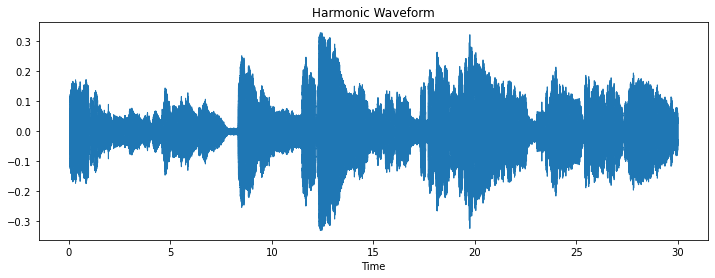

In [18]:
harmonic, _ = librosa.effects.hpss(y)

# Displaying the harmonic waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(harmonic, sr=sr)
plt.title('Harmonic Waveform')
plt.show()


In [20]:
harmonie_dict = {}
for num in range(20):
    harmonic, _ = librosa.effects.hpss(y)
    harmonie_dict[f'tempo{num+1}_ '] = harmonic

df_harmonie = pd.DataFrame(harmonie_dict.items())
df_harmonie

0                                                  1
0    tempo1_   [-0.0102061555, -0.013601985, -0.006429207, -0...
1    tempo2_   [-0.0102061555, -0.013601985, -0.006429207, -0...
2    tempo3_   [-0.0102061555, -0.013601985, -0.006429207, -0...
3    tempo4_   [-0.0102061555, -0.013601985, -0.006429207, -0...
4    tempo5_   [-0.0102061555, -0.013601985, -0.006429207, -0...
5    tempo6_   [-0.0102061555, -0.013601985, -0.006429207, -0...
6    tempo7_   [-0.0102061555, -0.013601985, -0.006429207, -0...
7    tempo8_   [-0.0102061555, -0.013601985, -0.006429207, -0...
8    tempo9_   [-0.0102061555, -0.013601985, -0.006429207, -0...
9   tempo10_   [-0.0102061555, -0.013601985, -0.006429207, -0...
10  tempo11_   [-0.0102061555, -0.013601985, -0.006429207, -0...
11  tempo12_   [-0.0102061555, -0.013601985, -0.006429207, -0...
12  tempo13_   [-0.0102061555, -0.013601985, -0.006429207, -0...
13  tempo14_   [-0.0102061555, -0.013601985, -0.006429207, -0...
14  tempo15_   [-0.0102061555, -0.013601985, -0.006429207, -0...
15  tempo16_   [-0.0102061555, -0.013601985, -0.006429207, -0...
16  tempo17_   [-0.0102061555, -0.013601985, -0.006429207, -0...
17  tempo18_   [-0.0102061555, -0.013601985, -0.006429207, -0...
18  tempo19_   [-0.0102061555, -0.013601985, -0.006429207, -0...
19  tempo20_   [-0.0102061555, -0.013601985, -0.006429207, -0...

In [24]:
harmonic, _ = librosa.effects.hpss(y1)

print(harmonic)


[-0.07328556 -0.08959673 -0.09214788 ...  0.04099715  0.0479783
  0.04999733]
